# Installs

In [20]:
!pip install inflection

# Imports

## Libraries

In [1]:
import pandas as pd
import inflection
import math
import locale
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [2]:
df_sales_raw = pd.read_csv('datasets/train.csv', low_memory=False)
df_stores_raw = pd.read_csv('datasets/store.csv', low_memory=False)

In [3]:
df_raw = pd.merge(df_sales_raw, df_stores_raw, how='left', on='Store')
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
126156,162,4,2015-04-09,5479,411,1,0,0,1,d,c,5340.0,3.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


# Data Description

## Rename Columns

In [4]:
df1 = df_raw.copy()
old_cols = df1.columns
new_cols = list(map(inflection.underscore, old_cols))
df1.columns = new_cols
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## Data Dimensions

In [5]:
df1.shape

(1017209, 18)

## Data Types

In [6]:
df1['date'] = pd.to_datetime(df1['date'], )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## Check NAs

In [7]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## Fillout NAs

In [8]:
# competition_distance               2642
max_value = 10 * df1['competition_distance'].max()
df1.loc[df1['competition_distance'].isna(), 'competition_distance'] = max_value

# competition_open_since_month    323348
df1['competition_open_since_month'] = df1.apply(lambda row: row['date'].month if math.isnan(row['competition_open_since_month']) else row['competition_open_since_month'], axis=1)

# competition_open_since_year     323348
df1['competition_open_since_year'] = df1.apply(lambda row: row['date'].year if math.isnan(row['competition_open_since_year']) else row['competition_open_since_year'], axis=1)

# promo2_since_week               508031
df1['promo2_since_week'] = df1.apply(lambda row: row['date'].week if math.isnan(row['promo2_since_week']) else row['promo2_since_week'], axis=1)

# promo2_since_year               508031
df1['promo2_since_year'] = df1.apply(lambda row: row['date'].year if math.isnan(row['promo2_since_year']) else row['promo2_since_year'], axis=1)

# promo_interval                  508031
df1.loc[df1['promo_interval'].isna(), 'promo_interval'] = ''

In [9]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
dtype: int64

## Check Types

In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

In [11]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [12]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
dtype: object


## Descriptive Statistical

In [14]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### Numerical Attributes

In [15]:
num_metrics = num_attributes.describe().T
num_metrics = num_metrics.rename(columns={'25%': 'q1', '50%': 'median', '75%': 'q3'})
num_metrics['amplitude'] = num_metrics['max'] - num_metrics['min']
num_metrics['ifq'] = num_metrics['q3'] - num_metrics['q1']
num_metrics['skew'] = num_attributes.apply(lambda x: x.skew())
num_metrics['kurtosis'] = num_attributes.apply(lambda x: x.kurtosis())
num_metrics = num_metrics[['mean', 'median', 'min', 'q1', 'q3', 'max', 'std', 'ifq', 'amplitude', 'skew', 'kurtosis']]
num_metrics

,mean,median,min,q1,q3,max,std,ifq,amplitude,skew,kurtosis
store,558.429727,558.0,1.0,280.0,838.0,1115.0,321.908651,558.0,1114.0,-0.000955,-1.200524
day_of_week,3.998341,4.0,1.0,2.0,6.0,7.0,1.997391,4.0,6.0,0.001593,-1.246873
sales,5773.818972,5744.0,0.0,3727.0,7856.0,41551.0,3849.926175,4129.0,41551.0,0.641460,1.778375
customers,633.145946,609.0,0.0,405.0,837.0,7388.0,464.411734,432.0,7388.0,1.598650,7.091773
open,0.830107,1.0,0.0,1.0,1.0,1.0,0.375539,0.0,1.0,-1.758045,1.090723
promo,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759,1.0,1.0,0.487838,-1.762018
school_holiday,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056,0.0,1.0,1.677842,0.815154
competition_distance,7386.296140,2330.0,20.0,710.0,6910.0,758600.0,39101.217148,6200.0,758580.0,18.434533,350.869718
competition_open_since_month,6.786849,7.0,1.0,4.0,10.0,12.0,3.311087,6.0,11.0,-0.042076,-1.232607
competition_open_since_year,2010.324840,2012.0,1900.0,2008.0,2014.0,2015.0,5.515593,6.0,115.0,-7.235657,124.071304


/home/biazotogabriel/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customers', ylabel='Density'>

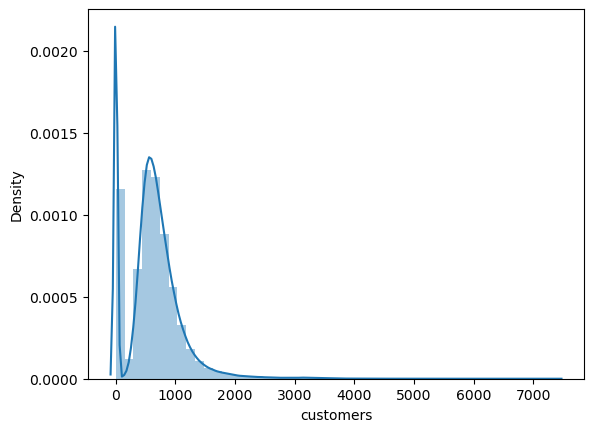

In [16]:
sns.distplot(df1['customers'])

### Categorical Attributes


In [17]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday     4
store_type        4
assortment        3
promo_interval    4
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

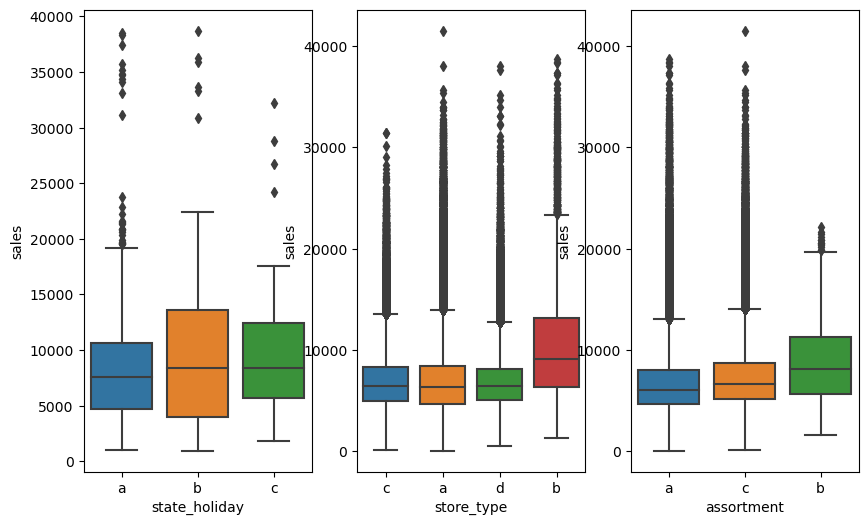

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]
sns.boxplot(x='state_holiday', y='sales', data=aux1)
plt.subplot(1,3,2)
aux1 = df1[(df1['sales'] > 0)]
sns.boxplot(x='store_type', y='sales', data=aux1)
plt.subplot(1,3,3)
aux1 = df1[(df1['sales'] > 0)]
sns.boxplot(x='assortment', y='sales', data=aux1)

# Feature Engineering

<img src="./images/mind_map_hipotesis.png" alt= “” width="800">

In [ ]:
# definir se a loja estava em promoção no dia da venda
locale.setlocale(locale.LC_TIME, ('en_US', 'UTF-8'))
df1['in_promo'] = df1[['date', 'promo_interval']].apply(lambda x: 1 if x['date'].strftime('%b') in x['promo_interval'].split(',') else 0, axis=1)